In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('car_age_price.csv')
cars

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
cars.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
#splitting the dataset
features = cars[['Year']]               
target = cars[['Price']] 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
x_train.shape

(89, 1)

In [8]:
x_test.shape


(23, 1)

In [9]:
y_test.shape

(23, 1)

In [10]:
y_train.shape

(89, 1)

In [13]:
cars.isnull().sum() 


Year     0
Price    0
dtype: int64

In [14]:
#correrlation between feature variable Year and target variable Price
cars.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


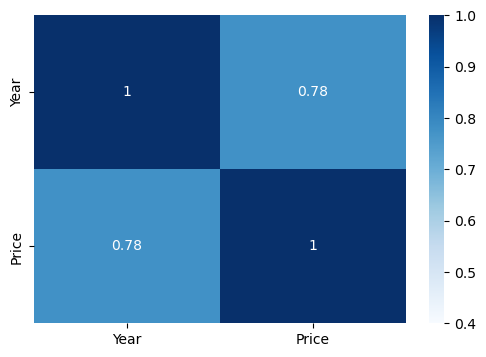

In [16]:
#heatmap
corrmatrix=cars.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corrmatrix,vmin=0.4,vmax=1,annot=True,cmap='Blues');

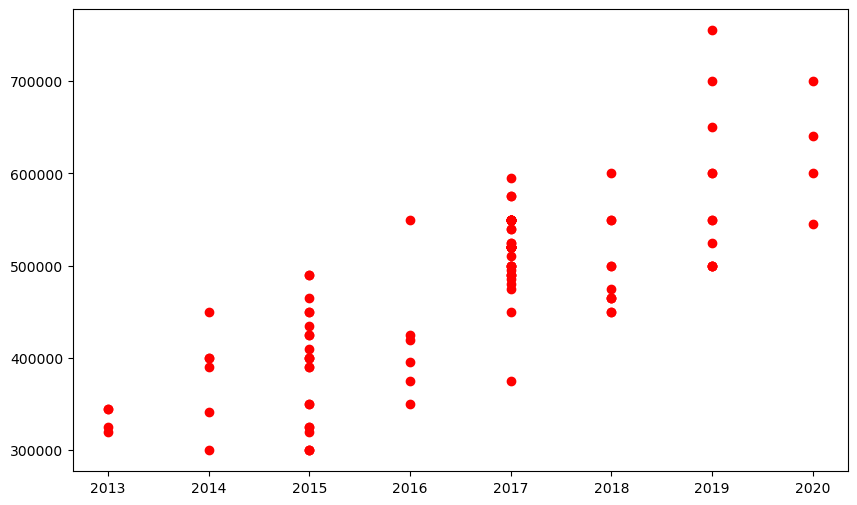

In [17]:
plt.figure(figsize =(10, 6))
plt.scatter(cars['Year'], cars['Price'], color ="red");

In [18]:
#the plot shows positive correlation  between Year and Price 

In [20]:
#linear regression model 
#y=target,x=feature 
y=cars['Price']
x=cars.drop('Price',axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#splitting x and y values,test size is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [25]:
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  3878767151.073449


In [26]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 3878767151.073449
R sqaured value is: 0.4347961632108023


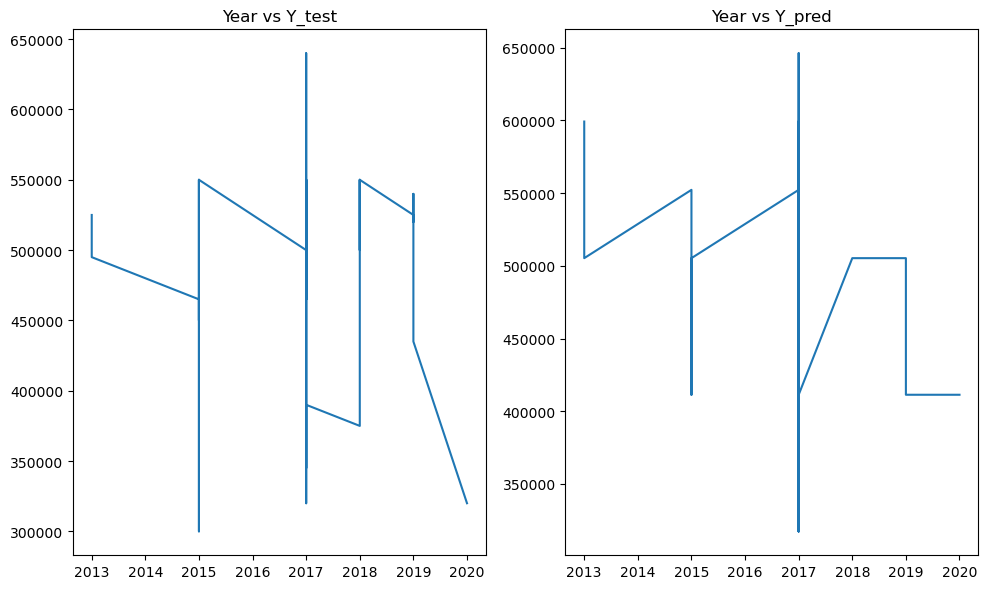

In [27]:
plt.figure(figsize=(10,6))
x1=x_test.sort_values(by='Year')

plt.subplot(1,2,1)
plt.plot(x1,y_test)#plotting Year and Y_test values
plt.title('Year vs Y_test')

plt.subplot(1,2,2)
plt.plot(x1,y_pred);#plotting Year and Y_pred values
plt.title('Year vs Y_pred')

plt.tight_layout()

In [30]:
#predicting  the possible price of a 2022 model second-hand grand i10

x_test2022=pd.DataFrame([2022],columns=['Year'])
ypred2022=model.predict(x_test2022)
ypred2022

array([740160.11937766])

In [32]:
#Standard Scaling on feature Year
car2=cars.drop('Price',axis=1)
from sklearn.preprocessing import StandardScaler
stdsclr= StandardScaler()
x2=stdsclr.fit_transform(car2)

In [33]:
x2=pd.DataFrame(x2,columns=['Year'])
x2

,Year
0,0.820032
1,1.436431
2,1.436431
3,0.820032
4,0.820032
...,...
107,-0.412768
108,-1.645567
109,-1.029167
110,-0.412768


In [35]:
x3=pd.concat([x2,cars['Price']],axis=1)
x3

,Year,Price
0,0.820032,465000
1,1.436431,755000
2,1.436431,700000
3,0.820032,465000
4,0.820032,465000
...,...,...
107,-0.412768,375000
108,-1.645567,300000
109,-1.029167,425000
110,-0.412768,420000


In [36]:
#Linear Regression after scaling feature Year
x1=x3.drop('Price',axis=1)
y1=cars['Price']

In [37]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=42)
model=lr.fit(x_train1,y_train1)
y_pred1=model.predict(x_test1)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test1,y_pred1))

MSE is: 3878767151.0726194


In [38]:
print('R sqaured value is:',r2_score(y_test1,y_pred1))

R sqaured value is: 0.4347961632109232


In [39]:
mean_squared_error = np.mean((y_pred1 - y_test1)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  3878767151.0726194


In [40]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [41]:
ls=Lasso(alpha=0.1)
model=ls.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 3878764025.5442586
R sqaured value is: 0.43479661865476726


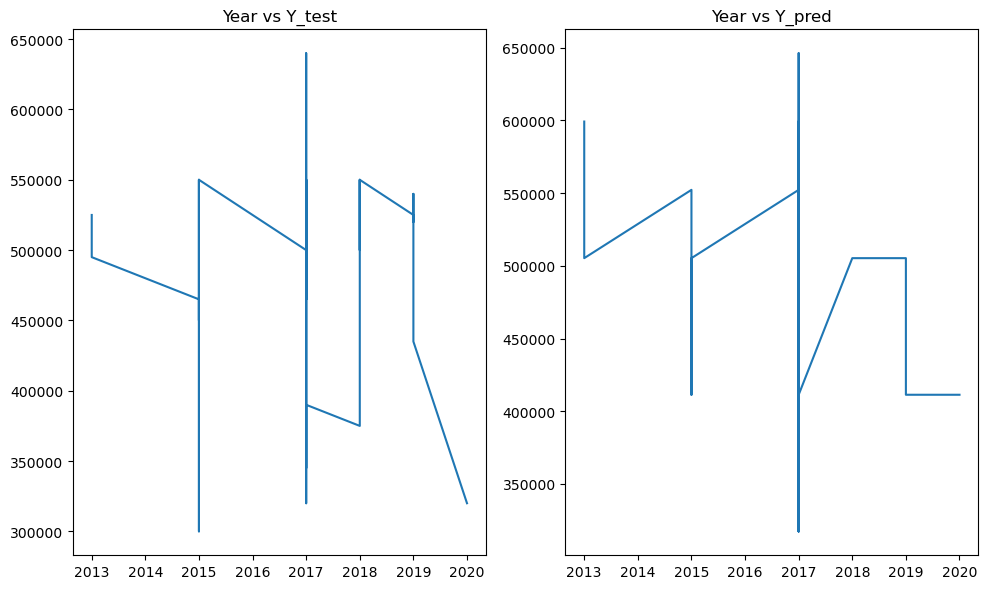

In [43]:
plt.figure(figsize=(10,6))
x1=x_test.sort_values(by='Year')

plt.subplot(1,2,1)
plt.plot(x1,y_test)
plt.title('Year vs Y_test')

plt.subplot(1,2,2)
plt.plot(x1,y_pred);
plt.title('Year vs Y_pred')

plt.tight_layout()

In [44]:
##predicting  the possible price of a 2022 model second-hand grand i10
x_test2022=pd.DataFrame([2022],columns=['Year'])
ypred2022=model.predict(x_test2022)
ypred2022

array([740159.90314002])

In [45]:
ls=Lasso(alpha=1)
model=ls.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 3878735896.222091
R sqaured value is: 0.4348007175862566


In [46]:
x_test2022=pd.DataFrame([2022],columns=['Year'])
ypred2022=model.predict(x_test2022)
ypred2022

array([740157.95700142])

In [48]:
#The predicted possible price of a 2022 model second-hand grand i10 (by Lasso Regression and alpha=1) is 740157.957 units

In [49]:
#OVERALL CONCLUSION

#Linear Regression  (.1.)MSE is: 3878767151.073449   (.2.)R sqaured value is: 0.4347961632108023

#Lasso Regression(alpha=0.1):(.1.)MSE is: 3878764025.5442586  (.2.)R sqaured value is: 0.43479661865476726

#Lasso Regression(alpha=1): (.1.)MSE is: 3878735896.222091  (.2.)R sqaured value is: 0.4348007175862566

#The predicted possible price of a 2022 model second-hand grand i10 
#1.(by Linear Regression) is 740160.119 units.
#2.(by Lasso Regression and alpha=0.1) is 740159.903 units.
#3.(by Lasso Regression and alpha=1) is 740157.957 units.
